# <span style="color:#54B1FF">Machine Learning Regression:</span> &nbsp; <span style="color:#1B3EA9"><b>K-Neighbors Regression (KNR)</b></span>

<br>

This notebook demonstrates K-Neighbor Regression (KNR) regression for both (a) one-feature and (b) two-feature regression problems.

Let's first import the packages we'll need for this notebook.

<br>

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors


<br>
<br>

___

## One-feature regression problem

Let's generate a dataset containing random noise.

* First we'll create a "true", continuous target process, which represents the target values that we hope to predict later using machine learning regression.
    * This "true" process will be a sine wave: $f(x) = \sin(x)$ for $x$ between 0 and 4$\pi$
    * Here *x* is the feature value and *f(x)* is the true target process
* Then we'll create a noisy dataset which approximates the true target process
* The machine learning goal will be to use the noisy data to try to recreate the original, true target process. 

<br>

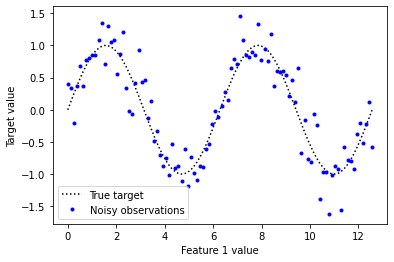

In [2]:

# create a "true" process  (this is what regression will try to predict)
n  = 100
x  = np.linspace(0, 4*np.pi, n)     # feature values
y0 = np.sin(x)                      # "true" target values


# create a noisy dataset  (based on the true process)
np.random.seed(10)
y  = np.sin(x) + 0.3 * np.random.randn(n)  # target values (with noise)


# plot the true and noisy datasets
plt.figure()
ax = plt.axes()
ax.plot(x, y0, 'k:', label='True target')
ax.plot(x, y, 'b.', label='Noisy observations')
ax.set_xlabel('Feature 1 value')
ax.set_ylabel('Target value')
ax.legend()
plt.show()


<br>

Let's fit the noisy target values to the feature values using the `KNeighborsRegressor` class, then predict the target values.

<br>

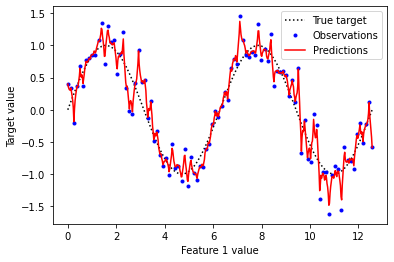

In [3]:

# fit a KN regressor
X    = np.array([x]).T
knr  = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knr.fit(X, y)


# predict the target values:
xi   = np.linspace(0, 4*np.pi, 500) # feature values for prediction
Xi   = np.array([xi]).T
yi   = knr.predict(Xi)              # predicted target values


# plot:
plt.figure()
plt.plot(x, y0, 'k:', label='True target')
plt.plot(x, y, 'b.', label='Observations')
plt.plot(xi, yi, 'r-', label='Predictions')
plt.xlabel('Feature 1 value')
plt.ylabel('Target value')
plt.legend()
plt.show()



<br>

Note that the KNN regressor predictions closely follow the noisy dataset.

The degree to which the (noisy) target values affect the predictions can be changed using the `n_neighbors` and `weights` keyword arguments.

For example, if we use `weights="uniform"`, we see that the predicted values more closely follow the true target. 

<br>

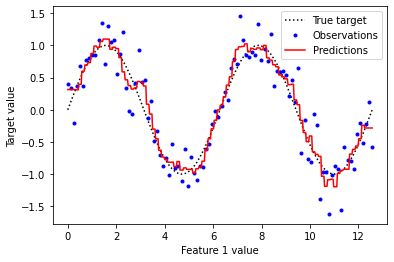

In [4]:

# fit a KN regressor
X    = np.array([x]).T
knr  = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
knr.fit(X, y)


# predict the target values:
xi   = np.linspace(0, 4*np.pi, 500) # feature values for prediction
Xi   = np.array([xi]).T
yi   = knr.predict(Xi)              # predicted target values


# plot:
plt.figure()
plt.plot(x, y0, 'k:', label='True target')
plt.plot(x, y, 'b.', label='Observations')
plt.plot(xi, yi, 'r-', label='Predictions')
plt.xlabel('Feature 1 value')
plt.ylabel('Target value')
plt.legend()
plt.show()


<br>
<br>

What about the `n_neighbors` parameter?  Let's try the values: `[1, 3, 10, 20]`:

<br>
<br>

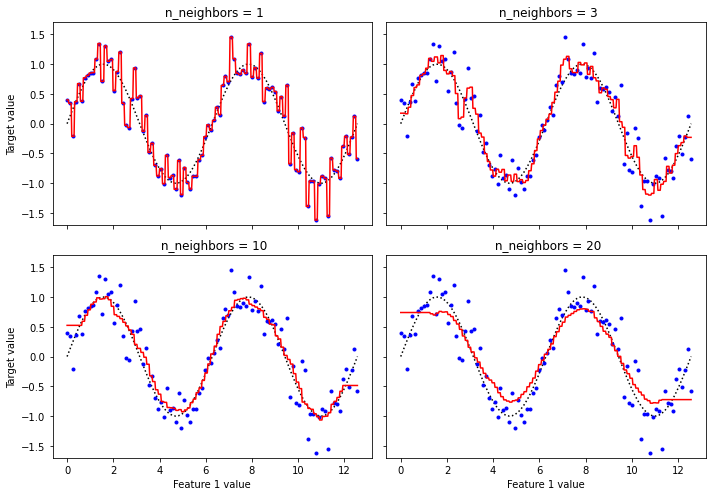

In [5]:

nns    = [1, 3, 10, 20]

fig,AX = plt.subplots(2, 2, figsize=(10,7))
axs    = AX.flatten()

for ax,nn in zip(axs,nns):

    X    = np.array([x]).T
    knr  = neighbors.KNeighborsRegressor(n_neighbors=nn, weights='uniform')
    knr.fit(X, y)
    yi   = knr.predict(Xi)              # predicted target values


    ax.plot(x, y0, 'k:', label='True target')
    ax.plot(x, y, 'b.', label='Observations')
    ax.plot(xi, yi, 'r-', label='Predictions')
    ax.set_title( f' n_neighbors = {nn}' )
 
[ax.set_xlabel('Feature 1 value')  for ax in AX[1]]
[ax.set_ylabel('Target value')  for ax in AX[:,0]]
plt.setp(AX, ylim=(-1.7, 1.7))
plt.setp( AX[0], xticklabels=[])
plt.setp( AX[:,1], yticklabels=[])
plt.tight_layout()
plt.show()



<br>
<br>

Notes:
* As `n_neighbors` increases, the predicted target values improve, but if `n_neighbors` is too large, the prediction begins to worsen
* Parameters like `n_neighbors` and `weights` generally need to be chosen in a problem specific manner, depending on factors like the number of observations and the amount of noise
* There are various ways to algorithmically optimize parameter selection; however, this is relatively advanced and is beyond the scope of this open book

<br>

Let's consider next how machine learning regression applies to a **two-feature** problem.

<br>
<br>

<br>
<br>

___

## Two-feature regression problem

Let's first generate a "true" target dataset containing two features.

Note that this dataset represents a [2D Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function#Two-dimensional_Gaussian_function).

<br>

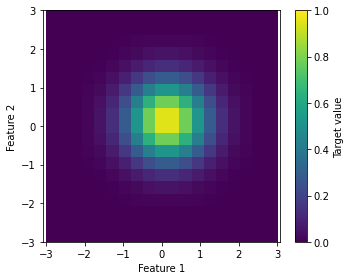

In [6]:

n     = 20
xmin  = -3
xmax  = 3


f0    = np.linspace(xmin, xmax, n)    # feature 1 values
f1    = np.linspace(xmin, xmax, n)    # feature 2 values


# create 2D feature space arrays:
# i.e., use np.meshgrid to generate all pairs of (f0,f1) values 
X0,X1 = np.meshgrid( f0 , f1 )
Ytrue = np.exp( -(X0**2 + X1**2) )   # a 2D Gaussian function


# plot:
plt.figure( figsize=(5,4) )
ax    = plt.axes()
pc    = ax.pcolor( X0, X1, Ytrue, vmin=0, vmax=1 )  # vmin and vmax set the color limits
cb    = plt.colorbar( pc )
cb.set_label('Target value')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.axis('equal')
plt.tight_layout()
plt.show()


<br>

Note that the feature space is 2D:  a target value prediction is possible at all points `(x0,x1)`.

Let's next follow the 1D example above, and add noise to this 2D dataset:

<br>

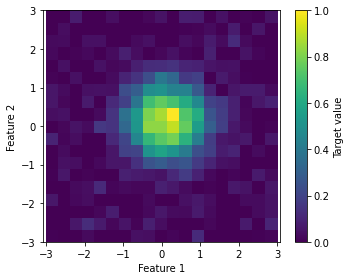

In [7]:

# add noise to target values
Y     = Ytrue + 0.05 * np.random.randn(n, n)  


# plot:
plt.figure( figsize=(5,4) )
ax    = plt.axes()
pc    = ax.pcolor( X0, X1, Y, vmin=0, vmax=1 )
cb    = plt.colorbar( pc )
cb.set_label('Target value')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.axis('equal')
plt.tight_layout()
plt.show()


<br>
<br>

The data is now noisy, just like in the 1D example above.

Let's next use a KN regressor to fit the data.

<br>
<br>

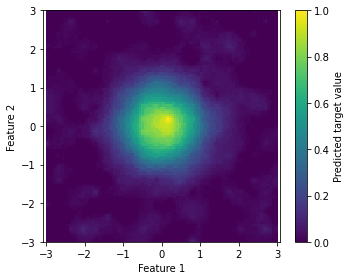

In [8]:

# construct feature values for prediction:
ni      = 100
f0i     = np.linspace(xmin, xmax, ni)    # feature 1 values  (for prediction)
f1i     = np.linspace(xmin, xmax, ni)    # feature 2 values  (for prediction)
X0i,X1i = np.meshgrid( f0i , f1i )       # 2D feature space  (for prediction)


# flatten the 2D feature space arrays into vectors:
x0,x1   = X0.flatten(), X1.flatten()     # 2D feature arrays flattened into vectors
x0i,x1i = X0i.flatten(), X1i.flatten()   # 2D feature arrays (for prediction) flattened into vectors
y       = Y.flatten()                    # 2D noisy target values flattened into vectors


# assemble feature matrices for machine learning:
X       = np.vstack([x0,x1]).T           # feature matrix (containing 2 columns, one per feature)
Xi      = np.vstack([x0i,x1i]).T         # feature matrix (for prediction)


# conduct machine learning regression
knr     = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knr.fit(X, y)
yi      = knr.predict(Xi)                 # predicted target values
Yi      = yi.reshape( (ni,ni) )           # reshaped into a 2D feature space array


# plot the results
plt.figure( figsize=(5,4) )
ax    = plt.axes()
pc    = ax.pcolor( X0i, X1i, Yi, vmin=0, vmax=1 )
cb    = plt.colorbar( pc )
cb.set_label('Predicted target value')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.axis('equal')
plt.tight_layout()
plt.show()

<br>
<br>

Notes:

* The predicted target values are much less noisy than the original (noisy) target data.
* We have used `weights='distance'`, but we know from the 1D example above that this might not be the best choice;  below we'll try `weights='uniform'`
* We have used `n_neighbors = 5`;  similar to the 1D example above, let's check the effect of `n_neighbors` on the predicted target values.

<br>
<br>

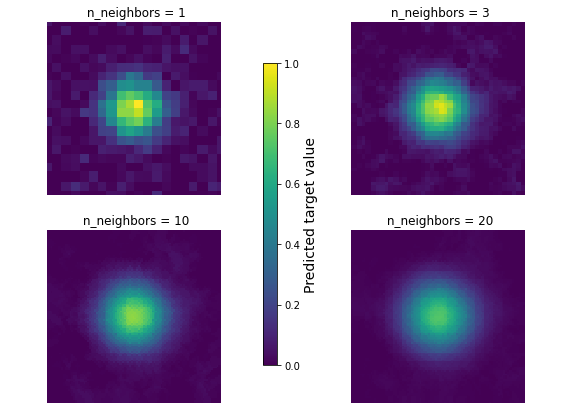

In [9]:

nns    = [1, 3, 10, 20]

fig,AX = plt.subplots(2, 2, figsize=(10,7))
axs    = AX.flatten()

for ax,nn in zip(axs,nns):

    knr  = neighbors.KNeighborsRegressor(n_neighbors=nn, weights='uniform')
    knr.fit(X, y)
    yi   = knr.predict(Xi)        # predicted target values
    Yi   = yi.reshape( (ni,ni) )  # reshaped into a 2D feature space array

    pc    = ax.pcolor( X0i, X1i, Yi, vmin=0, vmax=1 )
    ax.axis('equal')
    ax.axis('off')
    ax.set_title( f' n_neighbors = {nn}' )

cb = plt.colorbar( pc, cax=plt.axes([0.48,0.2,0.02,0.6]) )
cb.set_label('Predicted target value', size=14)
plt.show()



<br>
<br>

We can see that, similar to the 1D example above:

* Increasing `n_neighbors` tends to result in smoother (less noisy) predictions that more accurately reflect the true target values
* However, increasing `n_neighbors` too much causes poorer predictions

<br>

The next notebook repeats these examples using a different machine learning regression algorithm.
